# NLP 기초 Assignment - 16기 주지훈
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
# 필요한 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 8주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [3]:
spam = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/nlp/spam.csv')

In [4]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [5]:
# spam -> 0, ham -> 1로 바꾸기
spam.v1 = spam.v1.replace(['ham','spam'],[0,1])
spam

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [6]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


null값은 없다.

In [7]:
# 중복 데이터 확인
spam['v2'].nunique()

5169

총 데이터의 개수는 5572개이기 때문에 총 403개의 중복값이 존재한다.

In [8]:
# 중복 데이터 제거
spam.drop_duplicates(subset=['v2'], inplace=True)
len(spam)

5169

In [9]:
spam = spam.reset_index()
spam

,index,v1,v2
0,0,0,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
5164,5567,1,This is the 2nd time we have tried 2 contact u...
5165,5568,0,Will Ì_ b going to esplanade fr home?
5166,5569,0,"Pity, * was in mood for that. So...any other s..."
5167,5570,0,The guy did some bitching but I acted like i'd...


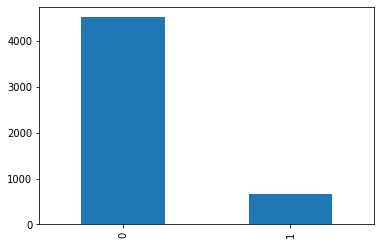

In [10]:
# 데이터의 분포 확인
spam['v1'].value_counts().plot(kind='bar')

In [11]:
# 특수 문자 제거 및 소문자로 변경
import re

def cleanText(data):
  text = re.sub('[^a-zA-Z]', ' ', data).lower()
  return text

spam.v2 = spam.v2.apply(cleanText)

In [12]:
# 확인
spam.iloc[5]['v2']

'freemsg hey there darling it s been   week s now and no word back  i d like some fun you up for it still  tb ok  xxx std chgs to send         to rcv'

## Tokenizing


In [13]:
import nltk

In [14]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['freemsg',
 'hey',
 'there',
 'darling',
 'it',
 's',
 'been',
 'week',
 's',
 'now',
 'and',
 'no',
 'word',
 'back',
 'i',
 'd',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'to',
 'send',
 'to',
 'rcv']

In [15]:
# 영어 불용어 리스트
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) 
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'again', 'when', 'not', 'hasn', 'did', 'will', 'y', 'nor', 'does', 'few', 'do', 'wouldn', 'was', 'above', 'myself', 'her', 'that', 'further', "wasn't", 'against', 'can', 'until', 'herself', 'other', "isn't", 'off', "mightn't", 'them', 'doing', "wouldn't", 'how', 'by', "won't", 'into', 't', 'each', 'couldn', 'too', 'at', 'ours', "you'd", 'theirs', 'shouldn', 'isn', "shouldn't", 'during', 'mightn', 'wasn', 'm', 'own', 'o', 'below', 'be', 'ourselves', 'yourselves', 'between', 'its', 'has', 'here', 'won', 'with', 'is', "didn't", 'same', 'from', 'having', "hasn't", 'haven', 'out', 'this', 'mustn', 'being', 'which', 'his', 'were', 'about', 'both', "hadn't", "aren't", 'after', 'yours', 'some', 'himself', 'but', 'me', 'most', 've', 'needn', 'then', 'or', 'hadn', 'have', 'to', 'before', 'didn', 'ma', 'who', 'any', 'what', "she's", 'doesn', "haven't", "doesn't", 'd', 'in', 'i', 's', 'd

### word_tokenize

In [16]:
wd_test = spam.copy()
result=[]
for row in wd_test.v2:
  tokenize = word_tokenize(row)
  words = [word for word in tokenize if word not in stop_words] # 불용어 제거
  result.append(words)

wd_test.v2 = result
wd_test

,index,v1,v2
0,0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,1,0,"[ok, lar, joking, wif, u, oni]"
2,2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,4,0,"[nah, think, goes, usf, lives, around, though]"
...,...,...,...
5164,5567,1,"[nd, time, tried, contact, u, u, pound, prize,..."
5165,5568,0,"[b, going, esplanade, fr, home]"
5166,5569,0,"[pity, mood, suggestions]"
5167,5570,0,"[guy, bitching, acted, like, interested, buyin..."


In [17]:
def tokenizing(tokenizer):
  result=[]
  for row in spam.v2:
    tokenize = tokenizer.tokenize(row)
    words = [word for word in tokenize if word not in stop_words] # 불용어 제거
    result.append(words)
  return result

### TreebankWordTokenizer

In [18]:
from nltk.tokenize import TreebankWordTokenizer

tb_test = spam.copy()
tb_test.v2 = tokenizing(TreebankWordTokenizer())
print(tb_test)

      index  v1                                                 v2
0         0   0  [go, jurong, point, crazy, available, bugis, n...
1         1   0                     [ok, lar, joking, wif, u, oni]
2         2   1  [free, entry, wkly, comp, win, fa, cup, final,...
3         3   0      [u, dun, say, early, hor, u, c, already, say]
4         4   0     [nah, think, goes, usf, lives, around, though]
...     ...  ..                                                ...
5164   5567   1  [nd, time, tried, contact, u, u, pound, prize,...
5165   5568   0                    [b, going, esplanade, fr, home]
5166   5569   0                          [pity, mood, suggestions]
5167   5570   0  [guy, bitching, acted, like, interested, buyin...
5168   5571   0                                 [rofl, true, name]

[5169 rows x 3 columns]


### WordPunctTokenizer

In [19]:
from nltk.tokenize import WordPunctTokenizer

wp_test = spam.copy()
wp_test.v2 = tokenizing(WordPunctTokenizer())
print(wp_test)

      index  v1                                                 v2
0         0   0  [go, jurong, point, crazy, available, bugis, n...
1         1   0                     [ok, lar, joking, wif, u, oni]
2         2   1  [free, entry, wkly, comp, win, fa, cup, final,...
3         3   0      [u, dun, say, early, hor, u, c, already, say]
4         4   0     [nah, think, goes, usf, lives, around, though]
...     ...  ..                                                ...
5164   5567   1  [nd, time, tried, contact, u, u, pound, prize,...
5165   5568   0                    [b, going, esplanade, fr, home]
5166   5569   0                          [pity, mood, suggestions]
5167   5570   0  [guy, bitching, acted, like, interested, buyin...
5168   5571   0                                 [rofl, true, name]

[5169 rows x 3 columns]


### MosesTokenizer

In [20]:
nltk.download('perluniprops')
nltk.download('nonbreaking_prefixes')
from nltk.tokenize.moses import MosesTokenizer

mt_test = spam.copy()
mt_test.v2 = tokenizing(MosesTokenizer())
print(mt_test)

[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Unzipping misc/perluniprops.zip.
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping corpora/nonbreaking_prefixes.zip.
      index  v1                                                 v2
0         0   0  [go, jurong, point, crazy, available, bugis, n...
1         1   0                     [ok, lar, joking, wif, u, oni]
2         2   1  [free, entry, wkly, comp, win, fa, cup, final,...
3         3   0      [u, dun, say, early, hor, u, c, already, say]
4         4   0     [nah, think, goes, usf, lives, around, though]
...     ...  ..                                                ...
5164   5567   1  [nd, time, tried, contact, u, u, pound, prize,...
5165   5568   0                    [b, going, esplanade, fr, home]
5166   5569   0                          [pity, mood, suggestions]
5167   5570   0  [guy, bitching, acted, like, interested, buyin...


### 결과 비교

In [21]:
pd.set_option('display.max_colwidth', -1) # 전체 출력

result_tokenizing = pd.DataFrame([['word_tokenize', wd_test.iloc[5]['v2']],
                      ['TreebankWordTokenizer', tb_test.iloc[5]['v2']],
                      ['WordPunctTokenizer', wp_test.iloc[5]['v2']],
                      ['MosesTokenizer', mt_test.iloc[5]['v2']]], columns = ['Tokenizer', 'result'])
result_tokenizing

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Tokenizer,result
0,word_tokenize,"[freemsg, hey, darling, week, word, back, like, fun, still, tb, ok, xxx, std, chgs, send, rcv]"
1,TreebankWordTokenizer,"[freemsg, hey, darling, week, word, back, like, fun, still, tb, ok, xxx, std, chgs, send, rcv]"
2,WordPunctTokenizer,"[freemsg, hey, darling, week, word, back, like, fun, still, tb, ok, xxx, std, chgs, send, rcv]"
3,MosesTokenizer,"[freemsg, hey, darling, week, word, back, like, fun, still, tb, ok, xxx, std, chgs, send, rcv]"


이외에도 여러 행을 비교해봤지만 결과는 모두 같았다. 특수문자와 불용어를 제거했기 때문에 결과에 큰 차이가 없는 것으로 보인다. 
따라서 MosesTokenizer로 선택했다.

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

### 토큰 빈도수

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# 정상 메일 토큰 빈도수
ct_vector1 = CountVectorizer(max_features= 500, stop_words = 'english', lowercase= False)
corpus_ham = sum(mt_test[mt_test.v1 == 0]['v2'], []) 
ct_ham = ct_vector1.fit_transform(corpus_ham)

In [23]:
count_ham = pd.DataFrame( {'word' : ct_vector1.get_feature_names(),
                           'count' : ct_ham.sum(axis = 0).flat})
count_ham.sort_values('count', ascending = False).head(10) # 상위 10개

,word,count
160,gt,288
245,lt,287
298,ok,255
155,got,227
212,know,225
229,like,222
153,good,215
67,come,212
450,ur,198
426,time,192


In [24]:
# spam 메일 토큰 빈도수
ct_vector2 = CountVectorizer(max_features= 500, stop_words = 'english', lowercase= False)
corpus_spam = sum(mt_test[mt_test.v1 == 1]['v2'], []) 
ct_spam = ct_vector2.fit_transform(corpus_spam)

In [25]:
count_spam = pd.DataFrame( {'word' : ct_vector2.get_feature_names(),
                           'count' : ct_spam.sum(axis = 0).flat})
count_spam.sort_values('count', ascending = False).head(10) # 상위 10개

,word,count
144,free,197
437,txt,141
446,ur,119
396,stop,114
251,mobile,111
415,text,109
61,claim,96
345,reply,96
486,www,83
322,prize,82


### Word2Vec

#### skip-gram

In [41]:
# 스팸에 대해 학습
model = Word2Vec(mt_test[mt_test.v1 == 1]['v2'], min_count=5, size=100, window=2, iter=200, sg=1) # skip-gram

In [42]:
model.save('w2v_model_spam')

In [44]:
w2v_model_spam = Word2Vec.load('w2v_model_spam')

In [45]:
w2v_model_spam.wv.doesnt_match("free txt ut stop mobile text claim reply www prize".split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'claim'

In [46]:
w2v_model_spam.wv.most_similar('free')

[('minutes', 0.42549678683280945),
 ('digital', 0.3763107657432556),
 ('comp', 0.3654780685901642),
 ('tomorrow', 0.36542177200317383),
 ('rental', 0.36523017287254333),
 ('half', 0.3612120747566223),
 ('true', 0.35916608572006226),
 ('tariffs', 0.3575182557106018),
 ('camera', 0.3469882607460022),
 ('phones', 0.3457595705986023)]

In [98]:
w2v_model_spam.most_similar(positive=['free', 'prize'], negative= ['ok'], topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('sony', 0.3760383725166321),
 ('gr', 0.33551520109176636),
 ('digital', 0.3228992223739624),
 ('minute', 0.3177478313446045),
 ('either', 0.3116297721862793),
 ('cd', 0.3026931881904602),
 ('mobiles', 0.2925875186920166),
 ('th', 0.2763407826423645),
 ('easy', 0.2746298313140869),
 ('delivery', 0.2737046182155609)]

In [86]:
# ham에 대해 학습
model2 = Word2Vec(mt_test[mt_test.v1 == 0]['v2'], min_count=5, size=100, window=2, iter=200, sg=1) # skip-gram

In [87]:
model2.save('w2v_model_ham')

In [88]:
w2v_model_ham = Word2Vec.load('w2v_model_ham')

In [89]:
w2v_model_ham.wv.doesnt_match("gt lt ok got know like good come ur time".split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'good'

In [90]:
w2v_model_ham.wv.most_similar('ok')

[('pub', 0.399289071559906),
 ('din', 0.39322471618652344),
 ('mood', 0.38380372524261475),
 ('uni', 0.38086122274398804),
 ('reaching', 0.37773042917251587),
 ('vikky', 0.37050923705101013),
 ('anything', 0.3583028316497803),
 ('ard', 0.35246625542640686),
 ('mm', 0.34728553891181946),
 ('etc', 0.34594911336898804)]

In [100]:
w2v_model_ham.most_similar(positive=['ok', 'like'], negative= ['free'], topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('body', 0.40533608198165894),
 ('anything', 0.32272475957870483),
 ('worries', 0.306276798248291),
 ('station', 0.3059197664260864),
 ('house', 0.2768152356147766),
 ('hour', 0.2764899730682373),
 ('broke', 0.2710268497467041),
 ('gentle', 0.2659171223640442),
 ('reaching', 0.2639482319355011),
 ('valentine', 0.2561299204826355)]

#### CBOW

In [75]:
# 스팸에 대해 학습
model = Word2Vec(mt_test[mt_test.v1 == 1]['v2'], min_count=5, size=100, window=2, iter=200, sg=0) # CBOW

In [76]:
model.save('w2v_model2_spam')

In [78]:
w2v_model2_spam = Word2Vec.load('w2v_model2_spam')

In [79]:
w2v_model2_spam.wv.doesnt_match("free txt ut stop mobile text claim reply www prize".split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'prize'

In [80]:
w2v_model2_spam.wv.most_similar('free')

[('minutes', 0.4009193181991577),
 ('phones', 0.39401984214782715),
 ('latest', 0.3842996656894684),
 ('colour', 0.3776649832725525),
 ('get', 0.37309759855270386),
 ('mths', 0.37264448404312134),
 ('tomorrow', 0.37079060077667236),
 ('plus', 0.3611152768135071),
 ('camera', 0.33692729473114014),
 ('ringtone', 0.3341505527496338)]

In [91]:
# ham에 대해 학습
model2 = Word2Vec(mt_test[mt_test.v1 == 0]['v2'], min_count=5, size=100, window=2, iter=200, sg=0) # CBOW

In [92]:
model2.save('w2v_model2_ham')

In [93]:
w2v_model2_ham = Word2Vec.load('w2v_model2_ham')

In [94]:
w2v_model2_ham.wv.doesnt_match("gt lt ok got know like good come ur time".split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'like'

In [95]:
w2v_model2_ham.wv.most_similar('ok')

[('home', 0.35972315073013306),
 ('ard', 0.35443925857543945),
 ('anything', 0.32045549154281616),
 ('mah', 0.28744393587112427),
 ('din', 0.2870328724384308),
 ('fren', 0.2510622441768646),
 ('u', 0.2458082139492035),
 ('morning', 0.24165180325508118),
 ('long', 0.23292739689350128),
 ('thanks', 0.23218059539794922)]

**spam**<br>
1. skip-gram
- spam 빈도수 상위 10개 단어 중 가장 유사하지 않은 단어: claim
- 'free'와 가장 유사한 단어: <br>
('minutes', 0.42549678683280945),<br>
('digital', 0.3763107657432556),<br>
 ('comp', 0.3654780685901642),<br>
 ('tomorrow', 0.36542177200317383),<br>
 ('rental', 0.36523017287254333),<br>
 ('half', 0.3612120747566223),<br>
 ('true', 0.35916608572006226),<br>
 ('tariffs', 0.3575182557106018),<br>
 ('camera', 0.3469882607460022),<br>
 ('phones', 0.3457595705986023)]


 2. CBOW<br>
 - spam 빈도수 상위 10개 단어 중 가장 유사하지 않은 단어: prize
 - 'free'와 가장 유사한 단어: <br>
 ('minutes', 0.4009193181991577),<br>
 ('phones', 0.39401984214782715),<br>
 ('latest', 0.3842996656894684),<br>
 ('colour', 0.3776649832725525),<br>
 ('get', 0.37309759855270386),<br>
 ('mths', 0.37264448404312134),<br>
 ('tomorrow', 0.37079060077667236),<br>
 ('plus', 0.3611152768135071),<br>
 ('camera', 0.33692729473114014),<br>
 ('ringtone', 0.3341505527496338)

**결과 해석**
- spma의 빈도수 상위 10개 단어 중 가장 유사하지 않은 단어로 skip-gram은 'claim', CBOW는 'prize'를 뽑았는데, 상품, 상과 같은 보상은 스팸 메일에 있을 확률이 높기 때문에 skip-gram의 결과가 더 신뢰가 간다.
- spam의 경우 몇 분 안남았다(minutes), 내일 마감(tommorrow) 등의 단어가 있을 확률이 높고, 실제로 spam의 빈도수 1위였던 free와 유사한 단어에 이 단어들이 나왔다. 그런데 skip-gram과 CBOW의 결과를 비교해보면 CBOW에는 'mths'와 같은 관련 없는 단어도 있기 때문에 skip-gram의 결과가 더 유용해 보인다. 

**ham**
1. skip-gram
- ham 빈도수 상위 10개 단어 중 가장 유사하지 않은 단어: good
- 'ok'와 가장 유사한 단어:<br>
('pub', 0.399289071559906),<br>
 ('din', 0.39322471618652344),<br>
 ('mood', 0.38380372524261475),<br>
 ('uni', 0.38086122274398804),<br>
 ('reaching', 0.37773042917251587),<br>
 ('vikky', 0.37050923705101013),<br>
 ('anything', 0.3583028316497803),<br>
 ('ard', 0.35246625542640686),<br>
 ('mm', 0.34728553891181946),<br>
 ('etc', 0.34594911336898804)

2. CBOW
- ham 빈도수 상위 10개 단어 중 가장 유사하지 않은 단어: like
- 'ok'와 가장 유사한 단어: <br>
('home', 0.35972315073013306),<br>
 ('ard', 0.35443925857543945),<br>
 ('anything', 0.32045549154281616),<br>
 ('mah', 0.28744393587112427),<br>
 ('din', 0.2870328724384308),<br>
 ('fren', 0.2510622441768646),<br>
 ('u', 0.2458082139492035),<br>
 ('morning', 0.24165180325508118),<br>
 ('long', 0.23292739689350128),<br>
 ('thanks', 0.23218059539794922)

**결과 해석**
- ham의 토큰별 빈도수 상위 10개 단어 중 가장 유사하지 않은 단어로 skip-gram은 good, CBOW는 like가 나왔는데, 둘 다 긍정적인 감정을 나타내는 단어이므로 결과는 비슷하다고 볼 수 있다.
- ham의 토큰별 빈도수 상위 20개 단어 중 단어로 볼 수 있는 ok와 가장 유사한 단어로 ham은 pub, CBOW는 home으로, 둘 다 장소에 가장 높은 유사도 점수를 줬다. 대체로 skip-gram보다 CBOW가 ard(사람), anything, mah(my), thanks 등 ok와의 유사도가 높아 보이는 단어가 더 많았다.

### FastText

In [107]:
from gensim.models import FastText

# spam
fast_model = FastText(mt_test[mt_test.v1 == 1]['v2'], size=100, window=5, min_count=5, workers=4, sg=1)

In [108]:
fast_model.wv.most_similar("free")

[('mobiles', 0.9998054504394531),
 ('phones', 0.9998037219047546),
 ('mobile', 0.9997845888137817),
 ('freemsg', 0.999758243560791),
 ('mobileupd', 0.9997398853302002),
 ('ringtones', 0.999738335609436),
 ('phone', 0.9997355341911316),
 ('charge', 0.999723494052887),
 ('next', 0.9997224807739258),
 ('latest', 0.999722421169281)]

**결과 해석**<br>
phone, ringtones는 Word2Vec에서도 나왔던 단어이지만 그 이외의 단어들은 FastText에서만 나왔다. FastText 결과를 보면 주로 핸드폰 요금, 최신 핸드폰 등 핸드폰과 관련 'free' 광고 spma이 많은 것으로 보인다. Word2Vec의 결과는 결과만 봤을 때 왜 free와 관련있는 건지 알기 힘들었는데, FastText는 결과들이 모두 연관되어 있고 similar 점수도 모두 1에 가까운 높은 점수를 띄고 있다. 따라서 FastText의 결과가 Word2Vec보다 신빙성 있어 보인다.

In [109]:
# ham
fast_model2 = FastText(mt_test[mt_test.v1 == 0]['v2'], size=100, window=5, min_count=5, workers=4, sg=1)

In [110]:
fast_model2.wv.most_similar("ok")

[('already', 0.9994665384292603),
 ('quite', 0.9994449615478516),
 ('leh', 0.999427855014801),
 ('dunno', 0.999405026435852),
 ('meet', 0.9994029998779297),
 ('wats', 0.9993625283241272),
 ('look', 0.9993569850921631),
 ('wana', 0.999355673789978),
 ('goin', 0.9993529319763184),
 ('lunch', 0.9993255138397217)]

**결과 해석**<br>
'ok'와 유사한 단어들을 보면 사람이 감정이나 기분의 정도를 표현하는 단어가 많다. 결과로 나온 단어들이 왜 ok와 유사한지 이해하기 힘들었던 Word2Vec에 비해 FastText의 결과가 더 신뢰가 간다.

### 결론
FastText가 Word2Vec보다 spam 데이터에 적합하다.

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

### 유사도

In [111]:
fast_model.wv.most_similar("free")

[('mobiles', 0.9998054504394531),
 ('phones', 0.9998037219047546),
 ('mobile', 0.9997845888137817),
 ('freemsg', 0.999758243560791),
 ('mobileupd', 0.9997398853302002),
 ('ringtones', 0.999738335609436),
 ('phone', 0.9997355341911316),
 ('charge', 0.999723494052887),
 ('next', 0.9997224807739258),
 ('latest', 0.999722421169281)]

핸드폰 요금, 최신 핸드폰 가격과 관련되어 무료라고 홍보하는 스팸 메일이 많다.

In [112]:
fast_model.wv.most_similar("stop")

[('store', 0.9998002648353577),
 ('unsubscribe', 0.9997965693473816),
 ('texts', 0.9997805953025818),
 ('sexy', 0.9997385740280151),
 ('subscription', 0.9997381567955017),
 ('welcome', 0.9997365474700928),
 ('charge', 0.9997327923774719),
 ('unsub', 0.9997280836105347),
 ('apply', 0.9997267723083496),
 ('choose', 0.9997265934944153)]

보통 광고 메일의 경우 수신 거부를 하겠냐고 묻는 내용이 있으므로 stop의 빈도수가 높게 나온 것으로 보이고, stop과 유사한 단어들을 봤을 때 구독과 관련된 스팸이 많은 것으로 보인다.

In [119]:
fast_model.wv.most_similar("prize")

[('guaranteed', 0.9997134208679199),
 ('caller', 0.9996242523193359),
 ('urgent', 0.9996147155761719),
 ('contact', 0.9996034502983093),
 ('valid', 0.9995850324630737),
 ('claim', 0.9995517730712891),
 ('contacted', 0.999544620513916),
 ('todays', 0.9995419979095459),
 ('attempt', 0.9995304942131042),
 ('bonus', 0.9995142817497253)]

상품으로 소비자들을 현혹시키는 스팸이 많으므로 prize의 빈도수가 상위 10개 안에 들었고, guaranteed(확실한, 보장된), urgent(긴급한), todays가 유사한 단어인 것으로 보아 상품 이벤트 기간이 얼마 안 남았으니 서두르라는 내용의 스팸 메일이 많다. 또한 caller, contact가 있는 것으로 보아 역시 핸드폰 관련 상품에 관한 내용의 스팸 메일도 많다는 것을 알 수 있다. 

**스펨 메일일 확률이 높은 메일**<br>
- 핸드폰+가격+상품 관련 메일
- 구독 중지처럼 무언가를 멈추는 것과 관련된 메일
- 상품 이벤트 기간이 얼마 안 남았다고 재촉하는 메일

### Wordcloud

In [134]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', max_words=100, width = 400, height = 300)

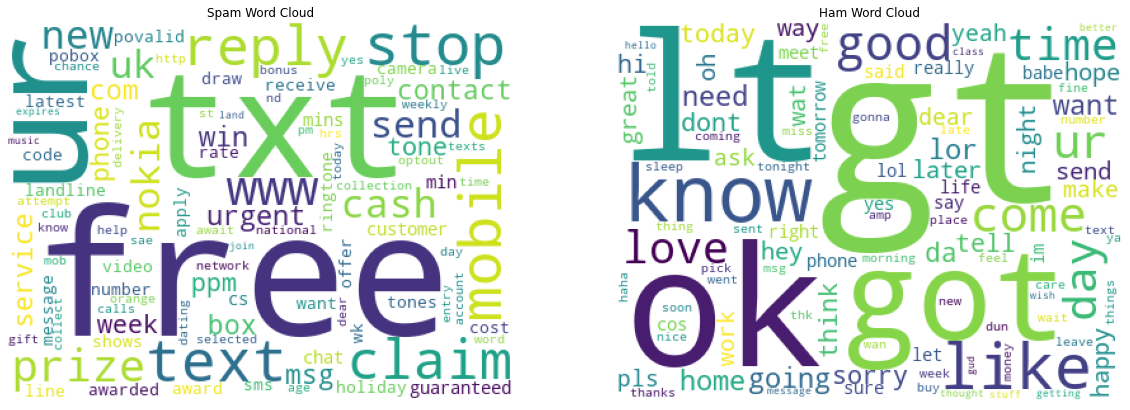

In [137]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Spam Word Cloud')
count_dic = dict(zip(count_spam['word'], count_spam['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

plt.subplot(1,2,2)
plt.title('Ham Word Cloud')
count_dic = dict(zip(count_ham['word'], count_ham['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

**Spam**<br>
- free, prize, new, gift, bonus 등 보상과 관련된 내용
- www: 웹 주소와 관련된 내용
- txt: 파일 첨부
- mobile: 핸드폰과 관련된 내용
- want, offer, apply: 소비자가 원하는 것을 소비자에게 제공한다는 내용

**Ham**
- good, love, want, need, yeah, happy, thanks: 긍정적인 감정과 관련된 내용
- dont, sorry: 거절과 관련된 내용
- 대체로 사람의 감정과 관련된, 또는 구체적인 상태(know, need)를 표현하는 내용

감정과 관련된 내용이 있으면 Ham 메일일 확률이 높다.